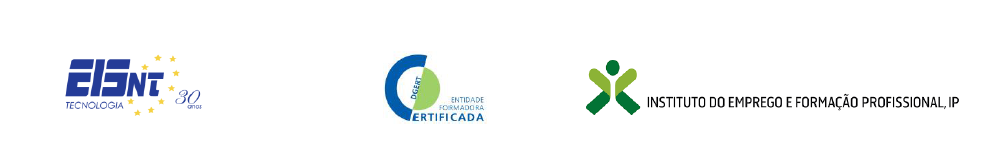

# Avaliação Final UFCD 10793

# 🧪 Tutorial Prático: Segmentação de Texto com Python


## 🎯 Objetivo
Aprender a segmentar textos em frases, palavras e parágrafos usando bibliotecas de **Processamento de Linguagem Natural** com Python, incluindo `nltk`, `spaCy` e `regex`, além de aplicar em GUI e exportar resultados.

---

## 📚 Bibliotecas utilizadas

### 🔹 nltk (Natural Language Toolkit)
- `sent_tokenize()`: segmenta texto em frases.
- `word_tokenize()`: segmenta texto em palavras (tokens).
- Requer download do recurso `punkt`.

### 🔹 spaCy
- Biblioteca robusta para PLN moderna.
- Carrega modelos pré-treinados (ex: `pt_core_news_sm`).
- Permite segmentação automática em `doc.sents` e `token.text`.

### 🔹 pandas
- Leitura e escrita de ficheiros CSV.
- Manipulação tabular de frases segmentadas.

### 🔹 tkinter
- Interface gráfica simples.
- Permite entrada e visualização de texto com botões.

---


## 🛠️ Instalação de bibliotecas



### ✅ 1. Criar ambiente virtual
No terminal corre

```bash
python -m venv venv

venv\\Scripts\\activate
pip install nltk 
pip install pandas
pip install spacy
python -m spacy download pt_core_news_sm



### ✅ 2. Download modelo punkt

📥 Download manual do modelo punkt
Se estiveres offline ou com firewall restrita, podes fazer download manual:

Vai a: https://github.com/nltk/nltk_data/tree/gh-pages/packages/tokenizers e faz download do ficheiro punkt.zip
Extrai o ficheiro para a pasta deste projeto.
Vais obter por exemplo, portuguese.pickle, english.pickle ...



In [1]:

import spacy
spacy.load('pt_core_news_sm')

## ✂️ Segmentação com NLTK

In [2]:
# segmentador_nltk.py
import os
import nltk
import pickle
from nltk.tokenize import PunktSentenceTokenizer, word_tokenize

# Caminho local para o ficheiro .pickle - substitui pelo teu caminho
caminho_modelo = r"D:\SegmentacaoDePalavras\punkt\portuguese.pickle"

# Verifica se o ficheiro existe
if not os.path.exists(caminho_modelo):
    raise FileNotFoundError(f"Modelo não encontrado em: {caminho_modelo}")

# Carrega o modelo Punkt do disco
with open(caminho_modelo, "rb") as f:
    tokenizer = pickle.load(f)

# 📄 Texto de exemplo
texto = "Olá! Este é um teste de segmentação. Vamos analisar palavra por palavra?"

# ✂️ Segmentar em frases com modelo local
frases = tokenizer.tokenize(texto)

print("➡️ Frases segmentadas:")
for frase in frases:
    print("-", frase)

# 🔠 Segmentar cada frase em palavras
print("\n➡️ Palavras por frase:")
from nltk.tokenize import TreebankWordTokenizer
tokenizer_palavras = TreebankWordTokenizer()
palavras = tokenizer_palavras.tokenize(frase)
print(palavras)

➡️ Frases segmentadas:
- Olá!
- Este é um teste de segmentação.
- Vamos analisar palavra por palavra?

➡️ Palavras por frase:
['Vamos', 'analisar', 'palavra', 'por', 'palavra', '?']


## 🧠 Segmentação com spaCy

In [3]:

import spacy
nlp = spacy.load("pt_core_news_sm")

doc = nlp(texto)

print("➡️ Frases (spaCy):")
for sent in doc.sents:
    print("-", sent.text)

print("\n➡️ Palavras (spaCy):")
for token in doc:
    print(token.text, end=" | ")


➡️ Frases (spaCy):
- Olá!
- Este é um teste de segmentação.
- Vamos analisar palavra por palavra?

➡️ Palavras (spaCy):
Olá | ! | Este | é | um | teste | de | segmentação | . | Vamos | analisar | palavra | por | palavra | ? | 

## ✍️ Segmentação personalizada com regex e parágrafos

In [4]:

import re

texto_paragrafos = '''Este é o primeiro parágrafo.

Este é o segundo parágrafo, com mais texto. 

O terceiro termina aqui.'''

# Parágrafos
paragrafos = texto_paragrafos.strip().split('\n\n')
print("➡️ Parágrafos:")
for p in paragrafos:
    print("-", p)

# Frases com regex
frases_regex = re.split(r'(?<=[.!?]) +', texto)
print("\n➡️ Frases com regex:", frases_regex)


➡️ Parágrafos:
- Este é o primeiro parágrafo.
- Este é o segundo parágrafo, com mais texto. 
- O terceiro termina aqui.

➡️ Frases com regex: ['Olá!', 'Este é um teste de segmentação.', 'Vamos analisar palavra por palavra?']


## 📄 Leitura de ficheiro externo e exportação

In [5]:
# segmentador_nltk.py
import os
import nltk
import pickle
from nltk.tokenize import PunktSentenceTokenizer, word_tokenize
import pandas as pd

# Caminho local para o ficheiro .pickle - substitui pelo teu caminho
caminho_modelo = r"D:\SegmentacaoDePalavras\punkt\portuguese.pickle"

# Verifica se o ficheiro existe
if not os.path.exists(caminho_modelo):
    raise FileNotFoundError(f"Modelo não encontrado em: {caminho_modelo}")

# Carrega o modelo Punkt do disco
with open(caminho_modelo, "rb") as f:
    tokenizer = pickle.load(f)



# Exemplo de leitura
with open("amostra.txt", "w", encoding="utf-8") as f:
    f.write("Hoje está sol. Amanhã talvez chova. O tempo é imprevisível.")

with open("amostra.txt", "r", encoding="utf-8") as f:
    texto_lido = f.read()

frases_lidas = tokenizer.tokenize(texto_lido)


# Exportar
df = pd.DataFrame(frases_lidas, columns=["Frase"])
df.to_csv("frases_exportadas.csv", index=False, encoding="utf-8")
print("✅ Exportado para 'frases_exportadas.csv'")


✅ Exportado para 'frases_exportadas.csv'


## 📝 Atividades práticas com resolução

### 📘 Atividade 1 – Contar frases e palavras

In [7]:
# segmentador_nltk.py
import os
import nltk
import pickle
from nltk.tokenize import PunktSentenceTokenizer, word_tokenize


# Caminho local para o ficheiro .pickle - substitui pelo teu caminho
caminho_modelo = r"D:\SegmentacaoDePalavras\punkt\portuguese.pickle"

# Verifica se o ficheiro existe
if not os.path.exists(caminho_modelo):
    raise FileNotFoundError(f"Modelo não encontrado em: {caminho_modelo}")

# Carrega o modelo Punkt do disco
with open(caminho_modelo, "rb") as f:
    tokenizer_frases = pickle.load(f)

# Tokenizador de palavras que não depende de punkt
tokenizador_palavras = TreebankWordTokenizer()

# Texto de exemplo
texto = "O Python é ótimo. É fácil de aprender. Vamos começar?"

# Segmentação de frases
frases = tokenizer_frases.tokenize(texto)

# Segmentação de palavras
palavras = tokenizador_palavras.tokenize(texto)

# Resultados
print("Número de frases:", len(frases))
print("Número de palavras:", len(palavras))

Número de frases: 3
Número de palavras: 11


### 📘 Atividade 2 – Analisar comprimento das frases

In [8]:

comprimentos = [len(tokenizador_palavras.tokenize(f)) for f in frases]
media = sum(comprimentos) / len(comprimentos)
print("Comprimentos:", comprimentos)
print("Média de palavras por frase:", media)


Comprimentos: [5, 5, 3]
Média de palavras por frase: 4.333333333333333


### 📘 Atividade 3 – Segmentar texto de ficheiro

In [9]:

with open("exemplo.txt", "w", encoding="utf-8") as f:
    f.write("Esta é a primeira. E esta é a segunda frase. Aqui vem a terceira!")

with open("exemplo.txt", "r", encoding="utf-8") as f:
    texto_f = f.read()

frases_lidas = tokenizer_frases.tokenize(texto_lido)
for i, frase in enumerate(frases, 1):
    print(f"Frase {i}: {frase} ({len(tokenizador_palavras.tokenize(frase))} palavras)")


Frase 1: O Python é ótimo. (5 palavras)
Frase 2: É fácil de aprender. (5 palavras)
Frase 3: Vamos começar? (3 palavras)


## 🖥️ Interface gráfica (Tkinter) com opções extra

In [10]:
import os
import nltk
import pickle
from nltk.tokenize import PunktSentenceTokenizer, word_tokenize
import tkinter as tk
from tkinter import filedialog
import pandas as pd

# Caminho local para o ficheiro .pickle - substitui pelo teu caminho
caminho_modelo = r"D:\SegmentacaoDePalavras\punkt\portuguese.pickle"

# Verifica se o ficheiro existe
if not os.path.exists(caminho_modelo):
    raise FileNotFoundError(f"Modelo não encontrado em: {caminho_modelo}")

# Carrega o modelo Punkt do disco
with open(caminho_modelo, "rb") as f:
    tokenizer_frases = pickle.load(f)

# Tokenizador de palavras que não depende de punkt
tokenizador_palavras = TreebankWordTokenizer()

def segmentar_texto():
    texto = entrada.get("1.0", "end-1c")
    frases = frases = tokenizer_frases.tokenize(texto)
    saida.delete("1.0", "end")
    for f in frases:
        saida.insert("end", f + "\n")

def contar_palavras():
    texto = entrada.get("1.0", "end-1c")
    palavras = tokenizador_palavras.tokenize(texto)
    saida.delete("1.0", "end")
    saida.insert("end", f"Total de palavras: {len(palavras)}")

def exportar_csv():
    texto = entrada.get("1.0", "end-1c")
    frases = tokenizer_frases.tokenize(texto)
    df = pd.DataFrame(frases, columns=["Frase"])
    file_path = filedialog.asksaveasfilename(defaultextension=".csv")
    if file_path:
        df.to_csv(file_path, index=False, encoding="utf-8")
        saida.insert("end", f"\nExportado para: {file_path}")

janela = tk.Tk()
janela.title("Segmentador de Texto")

tk.Label(janela, text="Texto:").pack()
entrada = tk.Text(janela, height=8, width=60)
entrada.pack()

tk.Button(janela, text="Segmentar", command=segmentar_texto).pack()
tk.Button(janela, text="Contar Palavras", command=contar_palavras).pack()
tk.Button(janela, text="Exportar CSV", command=exportar_csv).pack()

tk.Label(janela, text="Resultado:").pack()
saida = tk.Text(janela, height=10, width=60)
saida.pack()

janela.mainloop()


# ✅ Código com interface gráfica (TKinter) melhorada


In [11]:

import os
import pickle
import nltk
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
from nltk.tokenize import TreebankWordTokenizer

# Caminho para o modelo Punkt local
caminho_modelo = r"D:\SegmentacaoDePalavras\punkt\portuguese.pickle"

# Verificar existência do modelo
if not os.path.exists(caminho_modelo):
    messagebox.showerror("Erro", f"Modelo Punkt não encontrado em:\n{caminho_modelo}")
    exit()

# Carregar modelo Punkt
with open(caminho_modelo, "rb") as f:
    tokenizer_frases = pickle.load(f)

# Tokenizador de palavras (não depende do punkt)
tokenizador_palavras = TreebankWordTokenizer()

# Funções
def segmentar_texto():
    texto = entrada.get("1.0", "end-1c")
    frases = tokenizer_frases.tokenize(texto)
    saida.delete("1.0", "end")
    for f in frases:
        saida.insert("end", f + "\n")

def contar_palavras():
    texto = entrada.get("1.0", "end-1c")
    palavras = tokenizador_palavras.tokenize(texto)
    saida.delete("1.0", "end")
    saida.insert("end", f"Total de palavras: {len(palavras)}")

def exportar_csv():
    texto = entrada.get("1.0", "end-1c")
    frases = tokenizer_frases.tokenize(texto)
    df = pd.DataFrame(frases, columns=["Frase"])
    file_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
    if file_path:
        df.to_csv(file_path, index=False, encoding="utf-8")
        saida.insert("end", f"\nExportado para: {file_path}")

# Criar janela
janela = tk.Tk()
janela.title("📄 Segmentador de Texto em Português")
janela.configure(bg="#121212")
janela.geometry("900x700")
janela.columnconfigure((0,1,2), weight=1)
janela.rowconfigure((2,5), weight=1)

# Estilo dos botões
button_style = {
    "font": ("Segoe UI", 10, "bold"),
    "bg": "#2196F3",
    "fg": "white",
    "activebackground": "#1976D2",
    "relief": "flat",
    "bd": 0,
    "highlightthickness": 0,
    "padx": 10,
    "pady": 6
}

# Título
titulo = tk.Label(janela, text="Segmentador de Texto", font=("Segoe UI", 16, "bold"), bg="#121212", fg="white", pady=10)
titulo.grid(row=0, column=0, columnspan=3)

# Texto de entrada
tk.Label(janela, text="Texto de entrada:", bg="#121212", fg="white", font=("Segoe UI", 10, "bold")).grid(row=1, column=0, sticky="w", padx=10)
entrada = tk.Text(janela, height=10, wrap="word", font=("Consolas", 11), bg="#1e1e1e", fg="white", insertbackground="white", relief="flat", borderwidth=10)
entrada.grid(row=2, column=0, columnspan=3, padx=10, pady=5, sticky="nsew")

# Botões
frame_botoes = tk.Frame(janela, bg="#121212")
frame_botoes.grid(row=3, column=0, columnspan=3, pady=15)

tk.Button(frame_botoes, text="✂️ Segmentar Frases", command=segmentar_texto, **button_style).pack(side="left", padx=10)
tk.Button(frame_botoes, text="🔢 Contar Palavras", command=contar_palavras, **button_style).pack(side="left", padx=10)
tk.Button(frame_botoes, text="💾 Exportar para CSV", command=exportar_csv, **button_style).pack(side="left", padx=10)

# Resultado
tk.Label(janela, text="Resultado:", bg="#121212", fg="white", font=("Segoe UI", 10, "bold")).grid(row=4, column=0, sticky="w", padx=10)
saida = tk.Text(janela, height=12, wrap="word", font=("Consolas", 11), bg="#1e1e1e", fg="white", insertbackground="white", relief="flat", borderwidth=10)
saida.grid(row=5, column=0, columnspan=3, padx=10, pady=5, sticky="nsew")

janela.mainloop()



# 🧠 Desafios de Segmentação de Texto com Python

Estes desafios servem para pôr em prática os conhecimentos adquiridos sobre segmentação com `nltk`, `spaCy`, `regex`, `pandas` e `Tkinter`.

---

## 🔹 Desafio 1 – Frase mais longa

Cria um programa que:
- Recebe um texto.
- Segmenta-o em frases.
- Encontra e imprime a **frase com maior número de palavras**.

---

## 🔹 Desafio 2 – Filtrar frases curtas

Cria um script que:
- Segmenta um texto em frases.
- **Ignora frases com menos de 4 palavras**.
- Mostra apenas as frases restantes.

---

## 🔹 Desafio 3 – Segmentar várias linhas de um ficheiro CSV

Dado um ficheiro CSV com uma coluna `texto`, cria um programa que:
- Segmenta cada linha em frases.
- Guarda cada frase numa nova linha de um CSV final (`frases_resultado.csv`).

---

## 🔹 Desafio 4 – Comparar segmentação NLTK vs spaCy

Cria um script que:
- Segmenta o mesmo texto com `nltk` e `spaCy`.
- Imprime lado a lado os resultados para comparação.

---

## 🔹 Desafio 5 – Interface Tkinter Avançada

Altera o app com `Tkinter` para:
- Mostrar o **número de frases segmentadas**.
- Exibir a **média de palavras por frase**.
- Permitir colar texto diretamente da área de transferência (clipboard).

---

Boa prática!


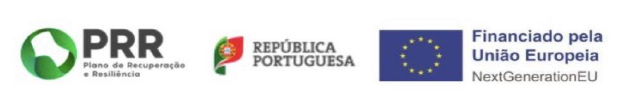